#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesperson Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

## Delivering
**Deadline**: *Friday, February 19, 2021*
**Devilry**: https://devilry.ifi.uio.no

## What to deliver?
On the Devilry website, upload one single zipped folder (.zip, .tgz or .tar.gz) which includes:
* PDF report containing:
    * Your name and username (!)
    * Instructions on how to run your program.
    * Answers to all questions from assignment.
    * Brief explanation of what you’ve done.
    * *Your PDF may be generated by exporting your Jupyter Notebook to PDF, if you have answered all questions in your notebook*
* Source code
    * Source code may be delivered as jupyter notebooks or python files (.py)
* The european cities file so the program will run right away.
* Any files needed for the group teacher to easily run your program on IFI linux machines.

**Important**: if you weren’t able to finish the assignment, use the PDF report to elaborate on what you’ve tried
and what problems you encountered. Students who have made an effort and attempted all parts of the assignment
will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesperson, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases.

In [23]:
from util import *
import sys
import itertools
import time


def exhaustive_search(distances, num_cities):
    min_distance = sys.maxsize
    path = ()

    for i in itertools.permutations(range(num_cities)):
        distance = tour_distance(i, distances)
        if distance < min_distance:
            min_distance = distance
            path = i
    return path + path[:1], min_distance

def main():
    numb_cities = 10
    print("CALCULATING OUTPUT....")
    cities, distance = read_input("european_cities.csv", numb_cities)
    path, cost = exhaustive_search(distance, numb_cities)
    print([cities[x] for x in path], cost)


if __name__ == '__main__':
    starttime = time.time()
    main()
    result_time = time.time() - starttime
    print("Time taken:  {0:.6f}s".format(result_time))

CALCULATING OUTPUT....
['Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen'] 7486.309999999999
Time taken:  12.905000s


What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

In [7]:
# Answer
Shortest route:  ['Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen'] 
Distance: 7486.310000
Time taken:  12.734998s
    
For 10 cities, there is 10! = 3628800 possible combinaitons to compute and this took 12.7s.
For 24 citites, there is 24! = 6.204 * 10^23 possible combinations to compute. 

For me the computation would take several years! I even tried to run for a couple of hours, but then my computer sounded like an airplane :D


SyntaxError: invalid syntax (<ipython-input-7-cb030e399408>, line 6)

## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**.

In [38]:
# Implement the algorithm here
from util import *
import random
import time
import statistics

def hillclimbing(distances, nCities):

    #initializing with random permutation
    path = random.sample(range(0,nCities), nCities)
    min_d = tour_distance(path, distances)

    while True:
        min_d2 = min_d
        min_d, path = hillclimb(path, min_d, distances)
        if min_d2 == min_d:
            break

    return path + path[:1], min_d



def hillclimb(path, min_d, distances):
    neighbours = find_neighbours(path)
    for i in neighbours:
        d = tour_distance(i, distances)
        if min_d > d:
            min_d = d
            path = i
            break
    return min_d, path

def find_neighbours(perm):
    neighbours = []
    for i in range(len(perm)-1):
        n = perm[:]
        n[i], n[i+1] = n[i+1], n[i]
        neighbours.append(n)
    return neighbours


if __name__ == "__main__":

    #Parameters
    num_of_cities = 10

    cities, distances = read_input("european_cities.csv", num_of_cities)
    results = []

    for x in range(20):
        start_time = time.time()
        path, dist = hillclimbing(distances, num_of_cities)
        results.append(dist)
        time_taken = time.time()-start_time
        print("%s Seconds " % time_taken)
        print("--Output--")
        print([cities[x] for x in path], dist)
    results.sort()
    print("Best:", results[0])
    print("Worst:", results[-1])
    print("Mean:", statistics.mean(results))
    print("Standard deviation:", statistics.stdev(results))

0.0 Seconds 
--Output--
['Dublin', 'Budapest', 'Bucharest', 'Copenhagen', 'Hamburg', 'Istanbul', 'Barcelona', 'Brussels', 'Belgrade', 'Berlin', 'Dublin'] 13358.29
0.0 Seconds 
--Output--
['Belgrade', 'Istanbul', 'Bucharest', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Budapest', 'Copenhagen', 'Berlin', 'Belgrade'] 9394.9
0.0 Seconds 
--Output--
['Belgrade', 'Barcelona', 'Dublin', 'Hamburg', 'Budapest', 'Istanbul', 'Bucharest', 'Berlin', 'Copenhagen', 'Brussels', 'Belgrade'] 10295.769999999999
0.00099945068359375 Seconds 
--Output--
['Belgrade', 'Berlin', 'Copenhagen', 'Hamburg', 'Dublin', 'Barcelona', 'Istanbul', 'Bucharest', 'Budapest', 'Brussels', 'Belgrade'] 10003.82
0.0 Seconds 
--Output--
['Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Dublin', 'Barcelona', 'Brussels', 'Hamburg', 'Belgrade', 'Istanbul', 'Bucharest'] 8428.210000000001
0.0 Seconds 
--Output--
['Hamburg', 'Berlin', 'Istanbul', 'Budapest', 'Brussels', 'Barcelona', 'Belgrade', 'Bucharest', 'Copenhagen', 'Dublin',

## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.

0.10099291801452637 Seconds 
--Output--
['Hamburg', 'Copenhagen', 'Berlin', 'Budapest', 'Bucharest', 'Istanbul', 'Belgrade', 'Barcelona', 'Dublin', 'Brussels', 'Hamburg'] 7486.3099999999995


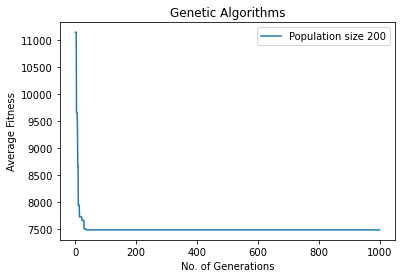

In [39]:
from util import *
import random
import itertools
from pmx import pmx_pair
import time
import numpy as np
import matplotlib.pyplot as plt


def evolutionary(distances, generation, ncities, population_size, nParents,
                 mut_rate, cross_rate):

    init_set = []
    init_size = 10
    for x in range(init_size):
        init_set.append(random.sample(range(ncities),ncities))

    population = [(tour_distance(p, distances),p) for p in init_set]

#   For plotting
    best_fit = []
    
    for x in range(generation):
#        print("============Generation {0} ===========".format(x))
        parents = select_parents(population, nParents)

        offspring = []
        if random.randint(0,100) <= cross_rate:
            offspring = recombine(parents)

        if random.randint(0,100) <= mut_rate:
            offspring = mutate(offspring)

        population = replacement_strategy(offspring, population, population_size, distances)
        best_fit.append(population[0][0])

    cost,path = population[0]
    return path + path[:1], cost, best_fit


def replacement_strategy(offspring, population, psize, distances):
    offspring_eval = [(tour_distance(p, distances),p) for p in offspring]
    population = population + offspring_eval
    population.sort()
    return population[:psize]


def mutate(offspring):
    #swap 2 random position with each other
    for x in offspring:
        a = random.randint(0,len(x)-1)
        b = random.randint(0,len(x)-1)
        x[a], x[b] = x[b], x[a]

    return offspring


def recombine(parents):
    #Parents should be in Even number
    offspring = []
    while parents:
        a=parents.pop()[1]
        b=parents.pop()[1]
#        cut = random.randint(1,len(a)-1)
        c,d = pmx_pair(a,b)
        offspring.append(c)
        offspring.append(d)

    return offspring


def select_parents(population, nParents):
    Efx = sum([x for (x,y) in population])
    parents = []
    for (a,b) in itertools.cycle(population):
        if nParents == 0:
            break
        #ProbabilityFPS
        Pfps = 1.0-(a/Efx)
        ab = random.uniform(0,1)
        if ab <= Pfps:
            parents.append((a,b))
            nParents = nParents-1

    return parents


if __name__ == "__main__":

    #Parameters
    population_size = 100
    no_of_generation = 1000
    no_of_parents = 10
    no_of_cities = 10
    mutation_rate = 50 #mutation rate in percentage
    cross_rate = 100 # recombination rate in percentage

    no_of_runs = 1

    cities, distances = read_input("european_cities.csv", no_of_cities)

    for pop_size in [200]:
        
        population_size = pop_size
        file = open("out_{0}_cities_genetic{1}.txt".format(no_of_cities,pop_size), "w")
        
        gen_fits = np.zeros(no_of_generation)
        
        for x in range(no_of_runs):
            start_time = time.time()
            path, cost, best_fits = evolutionary(distances, no_of_generation, no_of_cities,
                                    population_size, no_of_parents, mutation_rate,
                                    cross_rate)
            time_taken = time.time() - start_time
            file.write("{0};{1};{2};{3};\n".format(x, [cities[x] for x in path], cost, time_taken ))        
            print("%s Seconds " % time_taken)
            print("--Output--")
            print([cities[x] for x in path], cost)
            gen_fits = np.add(gen_fits, np.array(best_fits))
            
         
        gen_fits = gen_fits / no_of_runs
        x = np.linspace(0,no_of_generation,num=no_of_generation)
        plt.plot(x, gen_fits,label="Population size {0}".format(pop_size))

    plt.title("Genetic Algorithms")
    plt.xlabel("No. of Generations")
    plt.ylabel("Average Fitness")   
    plt.legend()
    plt.savefig("genetic.png", format="png", dpi=1000)       
        

    file.close()


Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

In [ ]:
# Answer
It did not find the shortest tour, but it came close. 
The running time for both 10 and 24 cities where severely decreased. 

## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

In [29]:
from lamarckian import *
from baldwinian import *
import time
import numpy as np
import matplotlib.pyplot as plt
from util import *

def main():

    #Params
    pop_size = 50
    num_generations = 100
    num_parents = 10
    num_cities = 10
    mutation_rate = 50
    cross_rate = 100
    learning_iterations = 5

    runs = 20

    cities, distances = read_input("european_cities.csv", num_cities)

    gen_fits = np.zeros(num_generations)

    for x in range(runs):
        path, distance, best_fits = lamarckian(cities, num_generations, num_cities, pop_size, num_parents, mutation_rate, cross_rate, learning_iterations)
        print([data[x] for x in path], distance)
        gen_fits = np.add(gen_fits, np.array(best_fits))


    gen_fits = gen_fits/runs
    x = np.linspace(0, num_generations, num=num_generations)
    plt.plot(x,gen_fits, label="Lamarckian")


    gen_fits = np.zeros(num_generations)

    for x in range(runs):
        path, distance, best_fits = baldwinian(cities, num_generations, num_cities, pop_size, num_parents, mutation_rate, cross_rate, learning_iterations)
        print([data[x] for x in path], distance)
        gen_fits = np.add(gen_fits, np.array(best_fits))


    gen_fits = gen_fits/runs
    x = np.linspace(0, num_generations, num=num_generations)
    plt.plot(x,gen_fits, label="Baldwinian")

    plt.title("Hybrid Algorithm")
    plt.xlabel("Number of generations")
    plt.ylabel("Average fitness")
    plt.legend()
    

if __name__ == '__main__':
    starttime = time.time()
    main()
    result_time = time.time() - starttime
    print("Time taken: {0:.6f}s".format(result_time))



TypeError: 'list' object cannot be interpreted as an integer